In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from math import sqrt, log
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import h2o
# h2o.init()
# from h2o.estimators import H2OTargetEncoderEstimator
# from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [3]:
import pandas as pd
from category_encoders import TargetEncoder

## Chargement des données

In [5]:
# Lecture des données

data=pd.read_csv('./Datatrain/test_requete_features.csv')
data=data.drop(['Unnamed: 0'],axis=1)

# Vérification du contenu
data.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,556,175,60,copenhagen,30,hungarian,0,6217,Boss Western,J.Halliday Inn,1,0,0
1,664,284,111,copenhagen,30,hungarian,0,6217,Accar Hotels,Safitel,0,1,0
2,96,124,37,copenhagen,30,hungarian,0,6217,Boss Western,Boss Western,0,0,0
3,865,277,107,copenhagen,30,hungarian,0,6217,Chillton Worldwide,Chill Garden Inn,1,1,0
4,58,203,65,copenhagen,30,hungarian,0,6217,Yin Yang,Royal Lotus,1,0,2


In [6]:
len(data)

232403

In [7]:
## Peut être enlever les variables comme hotel_id, avatar_id ? 

data.describe()

,hotel_id,price,stock,date,mobile,avatar_id,parking,pool,children_policy
count,232403.000000,232403.000000,232403.000000,232403.000000,232403.000000,232403.000000,232403.000000,232403.000000,232403.000000
mean,499.437352,156.787662,51.439155,22.865535,0.527416,71185.890182,0.437658,0.171177,0.065627
std,288.172693,79.472154,58.991369,14.131053,0.499249,37380.662677,0.496099,0.376664,0.303060
min,0.000000,38.000000,0.000000,2.000000,0.000000,6217.000000,0.000000,0.000000,0.000000
25%,250.000000,97.000000,5.000000,9.000000,0.000000,34264.000000,0.000000,0.000000,0.000000
50%,502.000000,140.000000,26.000000,20.000000,1.000000,92219.000000,0.000000,0.000000,0.000000
75%,748.000000,193.000000,86.000000,37.000000,1.000000,95251.000000,1.000000,0.000000,0.000000
max,998.000000,547.000000,284.000000,44.000000,1.000000,131651.000000,1.000000,1.000000,2.000000


## Analyse descriptive

### Distribution de la variable à prédire 'price'

Text(0.5, 1.0, 'Distribution of price after log transform')

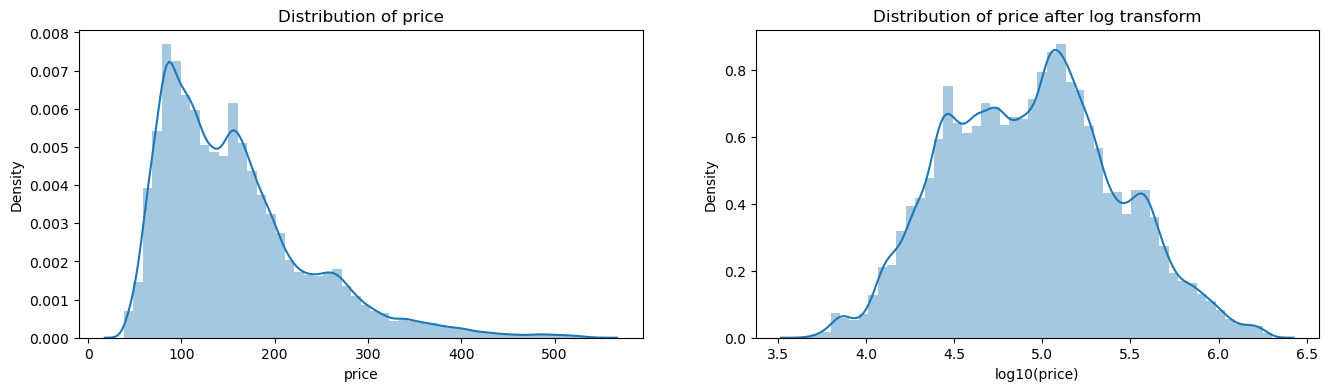

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data["price"], ax=ax1)
ax1.set_title('Distribution of price')

data["log_price"]=data["price"].map(lambda x : log(x))
sns.distplot(data["log_price"].rename('log10(price)'), ax=ax2)
ax2.set_title('Distribution of price after log transform')

### Distribution des variables quantitatives

Text(0.5, 1.0, 'Distribution of date')

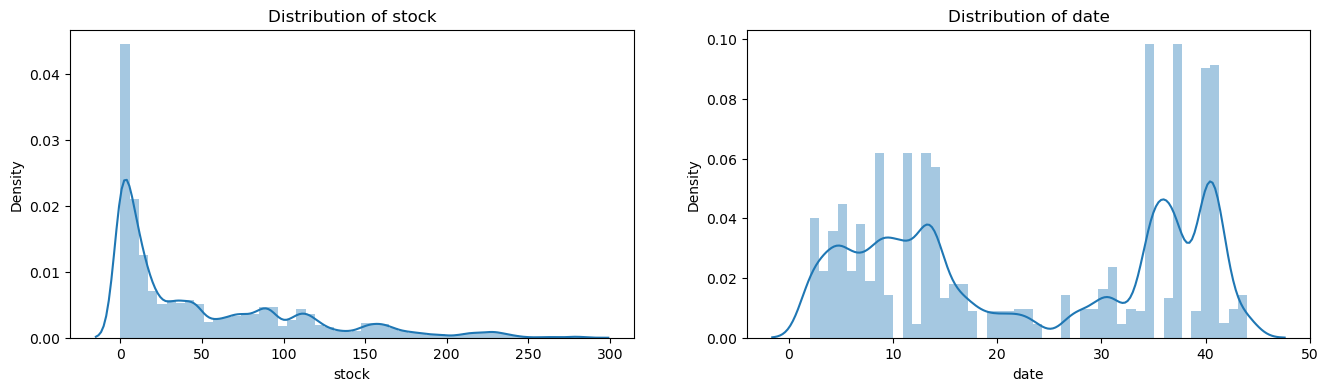

In [9]:
numerical=['stock','date']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data["stock"], ax=ax1)
ax1.set_title('Distribution of stock')


## Date peut être pas pertinent ? 
sns.distplot(data["date"], ax=ax2)
ax2.set_title('Distribution of date')

In [10]:
data[numerical].corr()

,stock,date
stock,1.000000,0.789836
date,0.789836,1.000000


### Distribution variables qualitatives

In [11]:
list_parking=data["parking"].tolist()
list_parking2=[list_parking.count(0),list_parking.count(1)]

list_pool=data["pool"].tolist()
list_pool2=[list_pool.count(0),list_pool.count(1)]

list_children=data["children_policy"].tolist()
list_children2=[list_children.count(0),list_children.count(1),list_children.count(2)]

list_mobile=data["mobile"].tolist()
list_mobile2=[list_mobile.count(0),list_mobile.count(1)]


Text(0.5, 1.0, 'mobile')

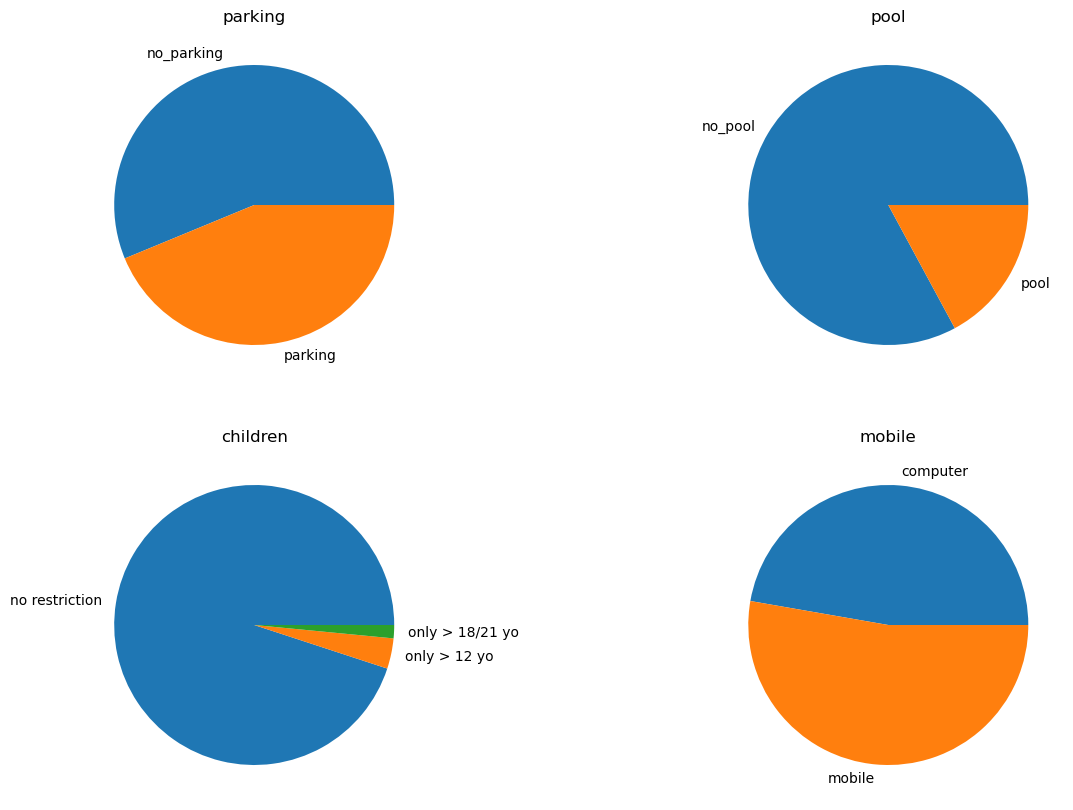

In [12]:
fig, axis = plt.subplots(2,2,figsize=(15,10))
axis[0,0].pie(list_parking2, labels = ['no_parking','parking'])
axis[0,0].set_title('parking')

axis[0,1].pie(list_pool2, labels = ['no_pool','pool'])
axis[0,1].set_title('pool')

axis[1,0].pie(list_children2, labels = ['no restriction','only > 12 yo','only > 18/21 yo' ])
axis[1,0].set_title('children')

axis[1,1].pie(list_mobile2, labels = ['computer','mobile'])
axis[1,1].set_title('mobile')

### Distribution du prix par rapport aux variables qualitatives

In [14]:
## Comprend pas pourquoi ça ne fonctionne pas de tous les afficher d'un coup ? 


# fig, axis = plt.subplots(2,2,figsize=(20,15))
# sns.boxplot(x=data["parking"], y=data["price"]).set(xlabel=None)
# axis[0,0].set_title('parking')

# sns.boxplot(x=data["pool"], y=data["price"]).set(xlabel=None)
# axis[0,1].set_title('pool')

# sns.boxplot(x=data["children_policy"], y=data["price"]).set(xlabel=None)
# axis[1,0].set_title('children')

# sns.boxplot(x=data["mobile"], y=data["price"]).set(xlabel=None)
# axis[1,1].set_title('mobile')

[Text(0.5, 0, '')]

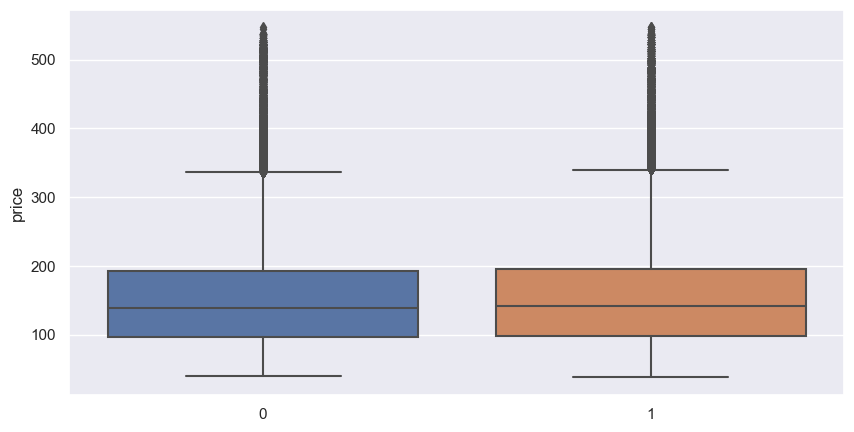

In [13]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["parking"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

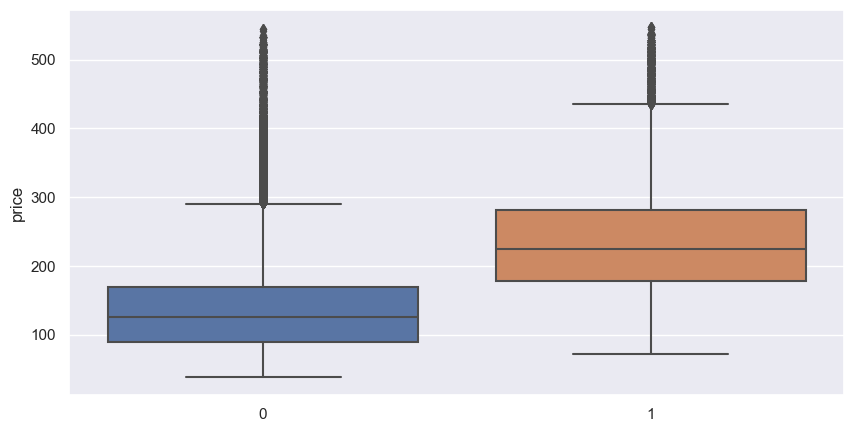

In [14]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["pool"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

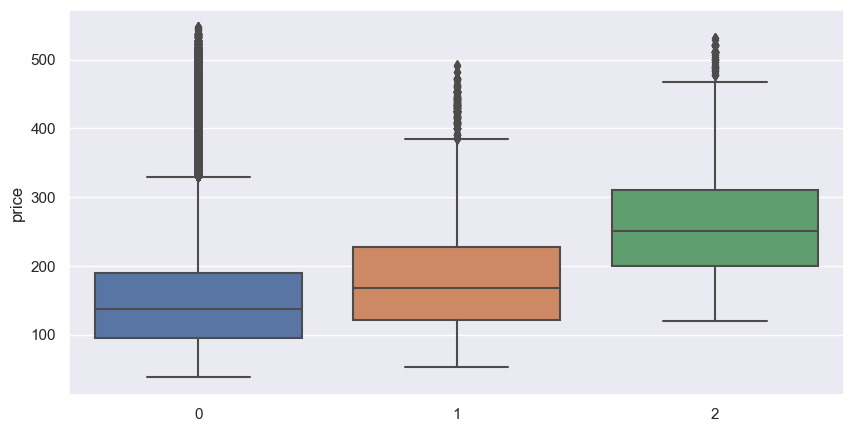

In [15]:
# Est-ce que l’hôtel a des restrictions concernant les enfants. 2 si l’hôtel interdit les enfants de moins de 18 ou 21 ans, 
# 1 si l’hôtel interdit les enfants de moins de 12 ans, 0 s’il autorise les enfants sans restrictions.

sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["children_policy"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

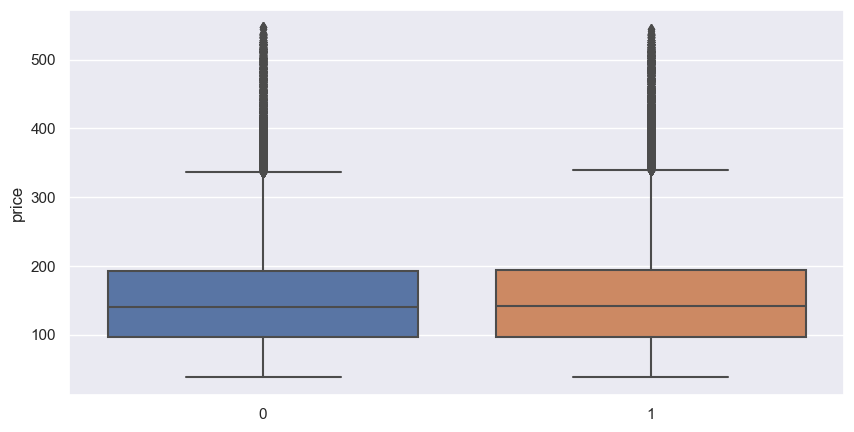

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["mobile"], y=data["price"]).set(xlabel=None)

## Modele

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV, LassoLarsCV
from itertools import cycle
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [18]:
data=data.drop(['log_price','avatar_id'],axis=1)

In [19]:
data

,hotel_id,price,stock,city,date,language,mobile,group,brand,parking,pool,children_policy
0,556,175,60,copenhagen,30,hungarian,0,Boss Western,J.Halliday Inn,1,0,0
1,664,284,111,copenhagen,30,hungarian,0,Accar Hotels,Safitel,0,1,0
2,96,124,37,copenhagen,30,hungarian,0,Boss Western,Boss Western,0,0,0
3,865,277,107,copenhagen,30,hungarian,0,Chillton Worldwide,Chill Garden Inn,1,1,0
4,58,203,65,copenhagen,30,hungarian,0,Yin Yang,Royal Lotus,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
232398,340,77,6,vilnius,15,estonian,0,Independant,Independant,0,0,0
232399,118,100,12,vilnius,15,estonian,0,Boss Western,Boss Western,1,0,0
232400,294,60,1,vilnius,15,estonian,0,Independant,Independant,1,0,0
232401,545,135,6,vilnius,15,estonian,0,Chillton Worldwide,Tripletree,0,0,0


In [68]:
# cat_to_encod = ['city', 'language', 'group', 'brand']

# enc = OneHotEncoder(categories='auto')
# for feature in cat_to_encod: 
#     data[feature]=pd.DataFrame(enc.fit_transform(data[[feature]]).toarray())

In [20]:
encoder = TargetEncoder()
data['city'] = encoder.fit_transform(data['city'], data['price'])
data['language'] = encoder.fit_transform(data['language'], data['price'])
data['group'] = encoder.fit_transform(data['group'], data['price'])
data['brand'] = encoder.fit_transform(data['brand'], data['price'])

In [23]:
## equivalent méthode OneHotEncoding, a potentiellement modifier
## pour ne pas avoir de string 


# data=pd.get_dummies(data, columns=['city', 'language', 'group', 'brand'])

In [21]:
data

,hotel_id,price,stock,city,date,language,mobile,group,brand,parking,pool,children_policy
0,556,175,60,195.878904,30,158.642022,0,133.349065,148.033929,1,0,0
1,664,284,111,195.878904,30,158.642022,0,186.260775,287.172670,0,1,0
2,96,124,37,195.878904,30,158.642022,0,133.349065,120.521786,0,0,0
3,865,277,107,195.878904,30,158.642022,0,216.461618,292.666171,1,1,0
4,58,203,65,195.878904,30,158.642022,0,148.372904,198.466757,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
232398,340,77,6,110.220730,15,152.734877,0,96.520890,96.520890,0,0,0
232399,118,100,12,110.220730,15,152.734877,0,133.349065,120.521786,1,0,0
232400,294,60,1,110.220730,15,152.734877,0,96.520890,96.520890,1,0,0
232401,545,135,6,110.220730,15,152.734877,0,216.461618,151.683322,0,0,0


In [22]:
price=data['price']
X_train, X_test, Y_train, Y_test = train_test_split(data,price,test_size=0.25,random_state=11)
X_train=X_train.drop(['price'],axis=1)
X_test=X_test.drop(['price'],axis=1)

In [23]:
X_train.head()

,hotel_id,stock,city,date,language,mobile,group,brand,parking,pool,children_policy
223994,224,16,165.598316,9,152.734877,0,148.372904,156.199916,1,0,0
132488,974,4,110.220730,4,161.145204,1,216.461618,151.683322,1,0,0
119466,131,12,139.136753,9,164.376068,1,220.811959,194.498679,1,1,0
2817,339,31,189.189347,22,158.642022,1,220.811959,194.498679,1,1,0
125440,73,127,147.375597,37,161.145204,0,148.372904,198.466757,0,0,1


In [ ]:
# scaler = StandardScaler()  
# scaler.fit(X_train)  
# Xr_train = scaler.transform(X_train)  
# # Meme transformation sur le test
# Xr_test = scaler.transform(X_test)

## Decision tree

In [ ]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
regtree= GridSearchCV(DecisionTreeRegressor(),param,cv=5,n_jobs=-1)
regtreeOpt=regtree.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regtreeOpt.best_score_,regtreeOpt.best_params_))

Ypred_regtree = regtreeOpt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regtree,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regtree))

In [ ]:
param=[{"max_features":list(range(2,10))}]
regrf= GridSearchCV(DecisionTreeRegressor(),param,cv=5,n_jobs=-1)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

Ypred_regrf = regrfOpt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regrf,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regrf))


## Random Forest

In [24]:
param=[{"max_features":list(range(2,10))}]
regrf= GridSearchCV(RandomForestRegressor(),param,cv=5,n_jobs=-1)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

Ypred_regrf = regrfOpt.predict(X_test)


print("MSE : ",mean_squared_error(Ypred_regrf,Y_test))
print("RMSE : ", sqrt(mean_squared_error(Ypred_regrf,Y_test)))
print("R2 : ",r2_score(Y_test,Ypred_regrf))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\elisa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\elisa\AppData\Local\Temp\ipykernel_11172\3286668484.py", line 3, in <module>
    regrfOpt=regrf.fit(X_train, Y_train)
  File "C:\Users\elisa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\elisa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 1392, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\elisa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 851, in evaluate_candidates
    enumerate(candidate_params), enumerate(cv.split(X, y, groups))
  File "C:\Users\elisa\Anaconda3\lib\site-packages\joblib\parallel.py", line 1061, in __call__
    self.retrieve()
  File "C:\Users\elisa\Anaconda3\lib\site-packa

TypeError: object of type 'NoneType' has no len()

## Gradient Boosting

In [ ]:
param=[{"max_depth":[1,2,3], "learning_rate":[0.1,0.5,1.0]}]
reggradboost = GridSearchCV(GradientBoostingRegressor(n_estimators=100), param, cv=10,n_jobs=-1)

reggradboost_Opt=reggradboost.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (reggradboost_Opt.best_score_,reggradboost_Opt.best_params_))

Ypred_gbreg = reggradboost_Opt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_gbreg,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_gbreg))


In [ ]:
param=[{"max_depth":[3,5,10,20], "learning_rate":[1.0,1.2,1.5,2.0,5.0]}]
reggradboost = GridSearchCV(GradientBoostingRegressor(n_estimators=100), param, cv=10,n_jobs=-1)

reggradboost_Opt=reggradboost.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (reggradboost_Opt.best_score_,reggradboost_Opt.best_params_))

Ypred_gbreg = reggradboost_Opt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_gbreg,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_gbreg))

## Regression Linéaire

#### Sans pénalisation

In [ ]:
reg_lin = linear_model.LinearRegression()

reglin = reg_lin.fit(X_train,Y_train)
Ypred_reglin = reglin.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_reglin,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_reglin))

#### Avec pénalisation Lasso

In [ ]:
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Ypred_regLasso=regLassOpt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regLasso,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regLasso))

In [ ]:
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
regCoef=regLasso.fit(X_train,Y_train).coef_
print(regCoef)

In [ ]:
coef = pd.Series(regCoef, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

In [ ]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

In [ ]:
model = LassoCV(cv=5, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(X_train,Y_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

## SVM

#### SVM Noyau linéaire

In [ ]:
param=[{"C":[0.01,0.03,0.05,0.1,0.2,0.3,0.5,1,1.2,1.5,1.7,2,3,4]}]
regsvm_l = GridSearchCV(SVR(kernel="linear"), param, cv=5, n_jobs=-1)  # try kernel="rbf" instead

regsvmOpt_l=regsvm_l.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (regsvmOpt_l.best_score_,regsvmOpt_l.best_params_))

Ypred_regsvml = regsvmOpt_l.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regsvml,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regsvml))



#### SVM Noyau gaussien

In [ ]:
param=[{"C":[0.01,0.03,0.05,0.1,0.2,0.3,0.5,1,1.2,1.5,1.7,2,3,4],"gamma":[0.01,0.02,0.05,0.07,0.1,0.15,0.2]}]
regsvm_g = GridSearchCV(SVR(kernel="rbf"), param, cv=5, n_jobs=-1)  

regsvmOpt_g=regsvm_g.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (regsvmOpt_g.best_score_,regsvmOpt_g.best_params_))

Ypred_regsvmg = regsvmOpt_g.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regsvmg,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regsvmg))


#### SVM Noyau polynomial

In [ ]:
param=[{"C":[0.01,0.03,0.05,0.1,0.2,0.3,0.5,1,1.2,1.5,1.7,2,3,4],"gamma":[0.01,0.02,0.05,0.07,0.1,0.15,0.2]}]
regsvm_p = GridSearchCV(SVR(kernel="rbf"), param, cv=5, n_jobs=-1)  

regsvmOpt_p=regsvm_p.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (regsvmOpt_p.best_score_,regsvmOpt_p.best_params_))

Ypred_regsvmp = regsvmOpt_p.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regsvmp,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regsvmp))

## Test Interpretabilité

In [110]:
feature_names = X_train.columns

In [22]:
lr = make_pipeline(
    StandardScaler(),
    LinearRegression(),
)


rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(max_depth=10),
)


mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=500, random_state=0),
)

lr.fit(X_train, Y_train)
print(f"Linear regression score: {lr.score(X_test, Y_test):.2f}")
rf.fit(X_train, Y_train)
print(f"Random forest score: {rf.score(X_test, Y_test):.2f}")
mlp.fit(X_train, Y_train)
print(f"MLP score: {mlp.score(X_test, Y_test):.2f}")

Linear regression score: 0.88
Random forest score: 0.89
MLP score: 0.99


In [111]:
for c, feature_name in zip(lr[1].coef_, feature_names):
    print(feature_name, c)

hotel_id 1.0740731784816895
stock -28.01826536345589
date 2.2910062422685202
mobile 0.07104192357687822
parking -0.3406091803720699
pool 2.524614061306238
children_policy 0.9050636763205495
city_amsterdam 21597932387214.098
city_copenhagen 22323161776533.59
city_madrid 20293432417062.977
city_paris 23586547656904.43
city_rome 21294238406388.105
city_sofia 14565713764614.08
city_valletta 13557136934036.367
city_vienna 19488304756546.418
city_vilnius 18472950730668.14
language_austrian 7058858341160.146
language_belgian 7313832069908.609
language_bulgarian 4512072961366.269
language_croatian 7103755603718.818
language_cypriot 7027647680722.443
language_czech 7301847966628.681
language_danish 6592686939914.704
language_dutch 7061004433483.869
language_estonian 7038070489104.74
language_finnish 5987032910769.094
language_french 5959017686539.653
language_german 6004029736122.842
language_greek 5652735851320.707
language_hungarian 6083041535709.51
language_irish 6534777422136.255
language_i

In [34]:
# pip install eli5 

  Using cached https://files.pythonhosted.org/packages/bc/c3/f068337a370801f372f2f8f6bad74a5c140f6fda3d9de154052708dd3c65/Jinja2-3.1.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/40/44/4a5f08c96eb108af5cb50b41f76142f0afa346dfa99d5296fe7202a11854/tabulate-0.9.0-py3-none-any.whl
  Found existing installation: Jinja2 2.10.3
    Uninstalling Jinja2-2.10.3:
      Successfully uninstalled Jinja2-2.10.3
Note: you may need to restart the kernel to use updated packages.


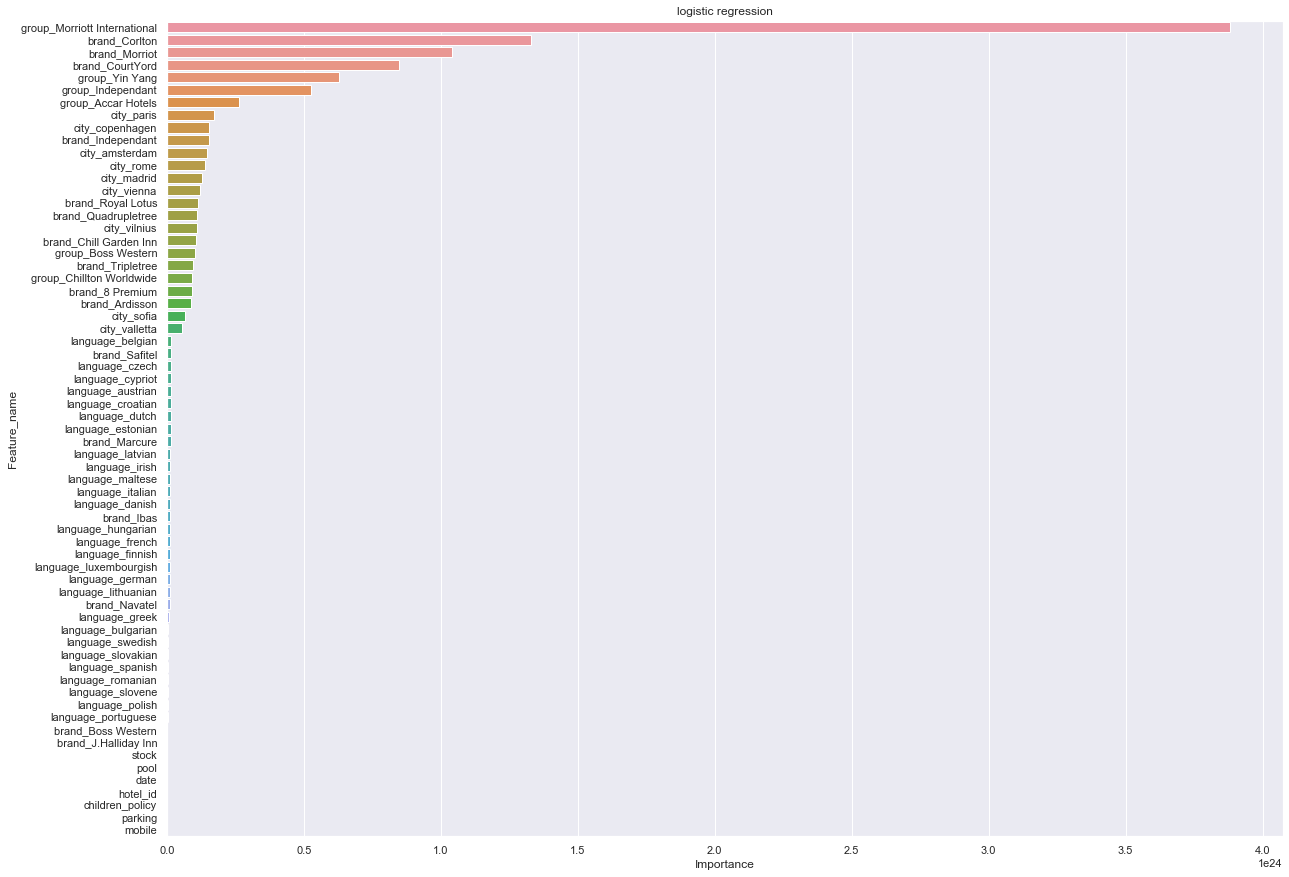

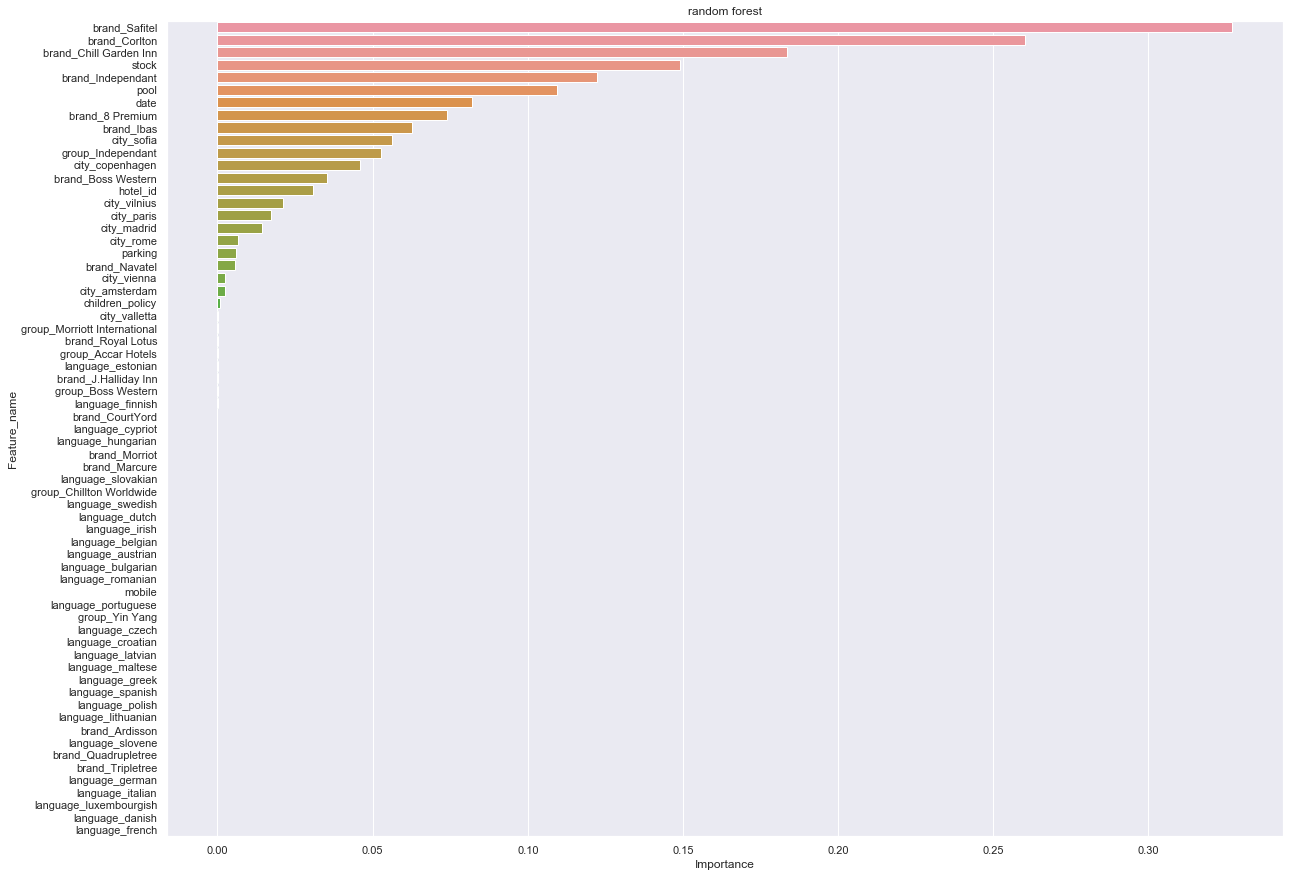

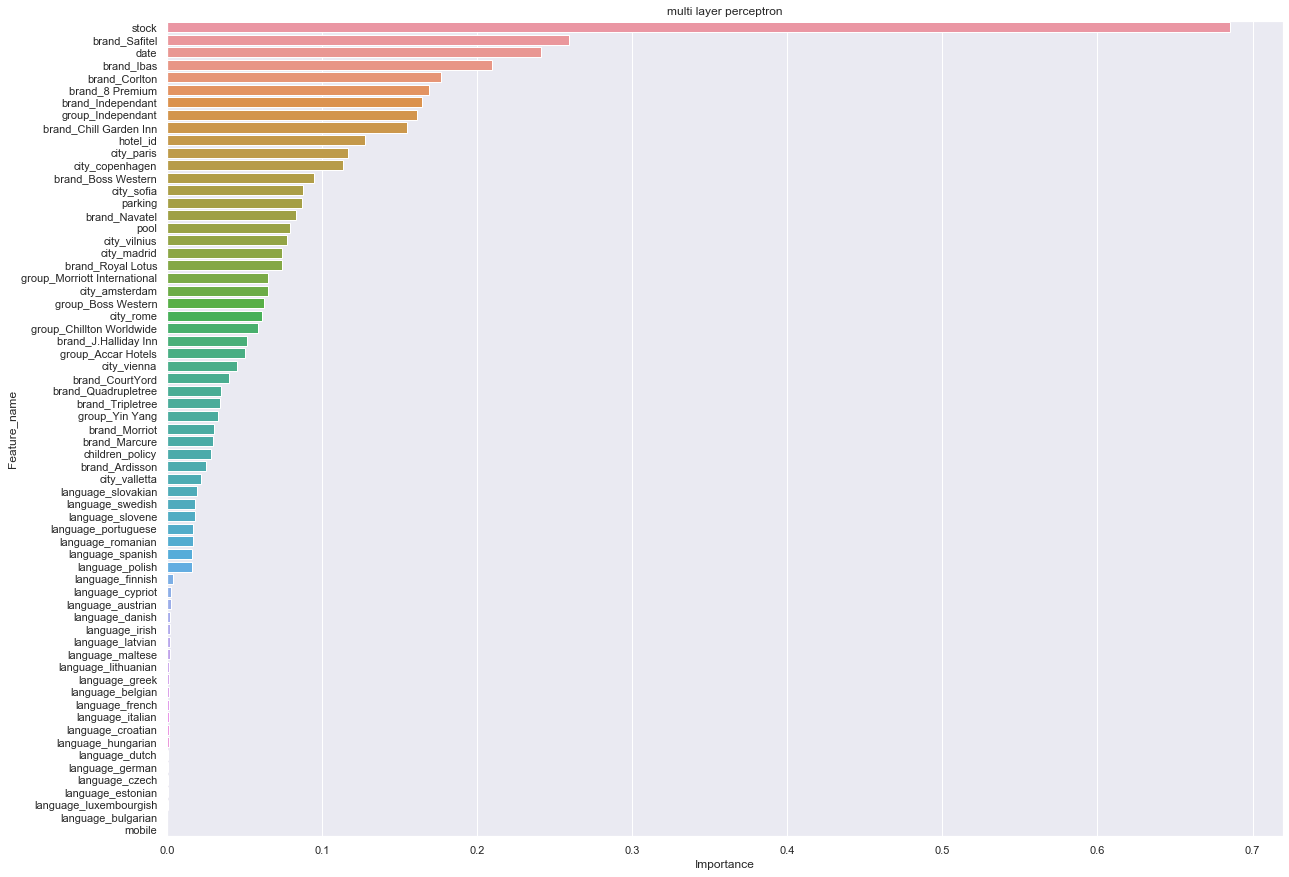

In [112]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
import seaborn as sns

features_importance_dict = {}
for model, name in zip([lr, rf, mlp], ['logistic regression', 'random forest', 'multi layer perceptron']):
  plt.figure(figsize=(20,15))
  permumtation_impor = PermutationImportance(model, random_state=0).fit(X_test, Y_test)
  features_importance = {'Feature_name':feature_names, 'Importance':permumtation_impor.feature_importances_}  
  features_importance = pd.DataFrame(features_importance) 
  features_importance = features_importance.sort_values(['Importance'], ascending=False) 
  features_importance_dict[name] = features_importance
  ax = sns.barplot(x="Importance", y="Feature_name", data=features_importance)
  plt.title(name)

In [113]:
pip install pdpbox

  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758245 sha256=2c29b0996d060015906f44534bd4366552ea2ffc63b938cd650534bafcb44618
  Stored in directory: C:\Users\elisa\AppData\Local\pip\Cache\wheels\c8\13\11\ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
  Created wheel for sklearn: filename=sklearn-0.0.post1-cp37-none-any.whl size=2348 sha256=e3cd15b5ce31637e90e4ef4679db4575f0aff75ea08eba2e7f3da03fe16717d6
  Stored in directory: C:\Users\elisa\AppData\Local\pip\Cache\wheels\04\0d\bd\ece5f15a5aea68fcb85632ecd7ad7f5ecf78d28152e8e1003e
Successfully built pdpbox sklearn
Note: you may need to restart the kernel to use updated packages.


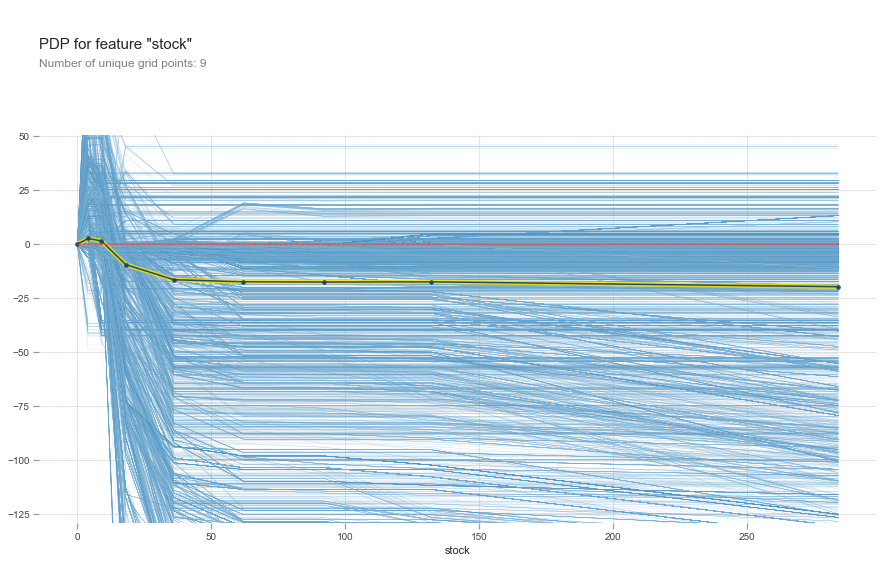

In [116]:
from pdpbox import pdp, get_dataset, info_plots

pdp_feat = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=feature_names, feature='stock')

pdp.pdp_plot(pdp_feat, 'stock', plot_lines=True, frac_to_plot=0.5)
plt.show()

In [ ]:
pip install shap

In [ ]:
import shap
shap.initjs() #needed to plot results directly on the notebook

idx = 1 # index of the instance we want to explain

explainer = shap.KernelExplainer(rf.predict, X_test.iloc[0:2000,:])
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0,:])

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[0:5,:]) #To speed up we just compute the shap values for 5 exemples
shap.summary_plot(shap_values, X_test.iloc[0:5,:])

# Log price with Random forest

In [16]:
data_train1=pd.read_csv('./Datatrain/TRAIN_requete2_features.csv')
data_train1=data_train1.drop(['Unnamed: 0'],axis=1)

In [17]:
data_train2=pd.read_csv('./Datatrain/test_requete_features.csv')
data_train2=data_train2.drop(['Unnamed: 0'],axis=1)

In [18]:
data_train2['index_request']=0


In [19]:
data_train=pd.concat([data_train1,data_train2])

In [20]:
data_train

,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy
0,639,149,110,valletta,35,greek,1,155054,1.0,Yin Yang,Royal Lotus,0,1,0
1,376,159,115,valletta,35,greek,1,155054,1.0,Accar Hotels,Marcure,0,0,0
2,985,68,70,valletta,35,greek,1,155054,1.0,Independant,Independant,1,0,0
3,377,127,84,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,1,0,0
4,200,130,80,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291402,620,170,12,vilnius,15,swedish,1,146515,0.0,Chillton Worldwide,Quadrupletree,0,1,0
291403,605,182,15,vilnius,15,swedish,1,146515,0.0,Yin Yang,Royal Lotus,1,0,0
291404,516,264,23,vilnius,15,swedish,1,146515,0.0,Morriott International,Corlton,1,0,2
291405,490,144,13,vilnius,15,swedish,1,146515,0.0,Yin Yang,Ardisson,1,0,0


In [21]:
data_train["log_price"]=data_train["price"].map(lambda x : log(x))
data_train.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy,log_price
0,639,149,110,valletta,35,greek,1,155054,1.0,Yin Yang,Royal Lotus,0,1,0,5.003946
1,376,159,115,valletta,35,greek,1,155054,1.0,Accar Hotels,Marcure,0,0,0,5.068904
2,985,68,70,valletta,35,greek,1,155054,1.0,Independant,Independant,1,0,0,4.219508
3,377,127,84,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,1,0,0,4.844187
4,200,130,80,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,0,0,0,4.867534


In [22]:
list_avatar_train=data_train['avatar_id'].unique()

In [23]:
data_train['index_request']=0

In [24]:
for avatar in list_avatar_train : 
    test1=data_train[data_train['avatar_id'] ==avatar].copy()
    list_date=test1['date'].unique()
    
    if len(list_date)==1 : 
        ech=test1[test1['date'] ==list_date[0]].copy()
        ech['index_request']=1
        data_train[data_train['avatar_id']==avatar]=ech
        
    else : 
        for i in range(len(list_date)) : 
            ech=test1[test1['date'] ==list_date[i]].copy()
            ech['index_request']=i+1
            test1[test1['date'] ==list_date[i]]=ech
        data_train[data_train['avatar_id']==avatar]=test1

In [25]:
data_train

,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy,log_price
0,639,149,110,valletta,35,greek,1,155054,1,Yin Yang,Royal Lotus,0,1,0,5.003946
1,376,159,115,valletta,35,greek,1,155054,1,Accar Hotels,Marcure,0,0,0,5.068904
2,985,68,70,valletta,35,greek,1,155054,1,Independant,Independant,1,0,0,4.219508
3,377,127,84,valletta,35,greek,1,155054,1,Boss Western,J.Halliday Inn,1,0,0,4.844187
4,200,130,80,valletta,35,greek,1,155054,1,Boss Western,J.Halliday Inn,0,0,0,4.867534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291402,620,170,12,vilnius,15,swedish,1,146515,3,Chillton Worldwide,Quadrupletree,0,1,0,5.135798
291403,605,182,15,vilnius,15,swedish,1,146515,3,Yin Yang,Royal Lotus,1,0,0,5.204007
291404,516,264,23,vilnius,15,swedish,1,146515,3,Morriott International,Corlton,1,0,2,5.575949
291405,490,144,13,vilnius,15,swedish,1,146515,3,Yin Yang,Ardisson,1,0,0,4.969813


In [27]:
data_test= pd.read_csv('test_set.csv')
data_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42


In [28]:
list_avatar_test=data_test['avatar_id'].unique()

In [29]:
data_test['index_request']=0

In [30]:
for avatar in list_avatar_test : 
    test1=data_test[data_test['avatar_id'] ==avatar].copy()
    list_date=test1['date'].unique()
    
    if len(list_date)==1 : 
        ech=test1[test1['date'] ==list_date[0]].copy()
        ech['index_request']=1
        data_test[data_test['avatar_id']==avatar]=ech
        
    else : 
        for i in range(len(list_date)) : 
            ech=test1[test1['date'] ==list_date[i]].copy()
            ech['index_request']=i+1
            test1[test1['date'] ==list_date[i]]=ech
        data_test[data_test['avatar_id']==avatar]=test1

In [31]:
data_test

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,index_request
0,0,1,vilnius,21,romanian,0,1,161,46,1
1,1,1,vilnius,21,romanian,0,1,187,32,1
2,2,1,vilnius,21,romanian,0,1,279,12,1
3,3,1,vilnius,21,romanian,0,1,395,10,1
4,4,1,vilnius,21,romanian,0,1,488,42,1
...,...,...,...,...,...,...,...,...,...,...
6639,6639,843,rome,5,irish,0,794,987,1,3
6640,6640,844,vienna,1,irish,1,794,26,1,4
6641,6641,844,vienna,1,irish,1,794,263,0,4
6642,6642,844,vienna,1,irish,1,794,456,0,4


In [32]:
hotels = pd.read_csv('features_hotels.csv', index_col=['hotel_id', 'city'])
data_test = data_test.join(hotels, on=['hotel_id', 'city'])
data_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,index_request,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,1,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,1,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,1,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,1,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,1,Accar Hotels,Safitel,1,1,1


In [33]:
city_encoding = data_train.groupby(['city'])['price'].mean().to_dict()
group_encoding=data_train.groupby(['group'])['price'].mean().to_dict()
brand_encoding=data_train.groupby(['brand'])['price'].mean().to_dict()
language_encoding=data_train.groupby(['language'])['price'].mean().to_dict()

In [34]:
print(city_encoding)

{'amsterdam': 167.3637779763132, 'copenhagen': 197.2622746127148, 'madrid': 140.87805651748658, 'paris': 192.33162307596047, 'rome': 149.66816276936046, 'sofia': 89.9752388997413, 'valletta': 145.32712422141262, 'vienna': 157.49647682273468, 'vilnius': 111.67270415283937}


In [35]:
encoder = TargetEncoder()
data_train['city'] = encoder.fit_transform(data_train['city'], data_train['price'])
data_train['language'] = encoder.fit_transform(data_train['language'], data_train['price'])
data_train['group'] = encoder.fit_transform(data_train['group'], data_train['price'])
data_train['brand'] = encoder.fit_transform(data_train['brand'], data_train['price'])


In [36]:
data_test['city'] = data_test['city'].map(city_encoding)
data_test['group'] = data_test['group'].map(group_encoding)
data_test['brand'] = data_test['brand'].map(brand_encoding)
data_test['language'] = data_test['language'].map(language_encoding)

In [37]:
data_test

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,index_request,group,brand,parking,pool,children_policy
0,0,1,111.672704,21,155.764517,0,1,161,46,1,135.071234,148.814340,1,0,0
1,1,1,111.672704,21,155.764517,0,1,187,32,1,189.431162,198.945460,1,1,0
2,2,1,111.672704,21,155.764517,0,1,279,12,1,96.759730,96.759730,1,0,0
3,3,1,111.672704,21,155.764517,0,1,395,10,1,189.431162,81.183861,0,0,0
4,4,1,111.672704,21,155.764517,0,1,488,42,1,189.431162,293.348114,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,6639,843,149.668163,5,165.322612,0,794,987,1,3,189.431162,81.183861,1,0,0
6640,6640,844,157.496477,1,165.322612,1,794,26,1,4,189.431162,198.945460,1,0,0
6641,6641,844,157.496477,1,165.322612,1,794,263,0,4,135.071234,122.836223,1,0,0
6642,6642,844,157.496477,1,165.322612,1,794,456,0,4,149.996392,158.068632,1,0,0


In [38]:
# data_train=pd.get_dummies(data_train, columns=['city', 'language', 'group', 'brand'])
# data_test=pd.get_dummies(data_test, columns=['city', 'language','group', 'brand'])

In [39]:
data_train.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy,log_price
0,639,149,110,145.327124,35,157.175881,1,155054,1,149.996392,201.830076,0,1,0,5.003946
1,376,159,115,145.327124,35,157.175881,1,155054,1,189.431162,198.945460,0,0,0,5.068904
2,985,68,70,145.327124,35,157.175881,1,155054,1,96.759730,96.759730,1,0,0,4.219508
3,377,127,84,145.327124,35,157.175881,1,155054,1,135.071234,148.814340,1,0,0,4.844187
4,200,130,80,145.327124,35,157.175881,1,155054,1,135.071234,148.814340,0,0,0,4.867534


In [40]:
# data_test=data_test.drop(['index','order_requests'],axis=1)
data_test=data_test.drop(['index'],axis=1)

In [41]:
data_test.head()

,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,index_request,group,brand,parking,pool,children_policy
0,1,111.672704,21,155.764517,0,1,161,46,1,135.071234,148.814340,1,0,0
1,1,111.672704,21,155.764517,0,1,187,32,1,189.431162,198.945460,1,1,0
2,1,111.672704,21,155.764517,0,1,279,12,1,96.759730,96.759730,1,0,0
3,1,111.672704,21,155.764517,0,1,395,10,1,189.431162,81.183861,0,0,0
4,1,111.672704,21,155.764517,0,1,488,42,1,189.431162,293.348114,1,1,1


In [42]:
# data_train=data_train.drop(['avatar_id','hotel_id'],axis=1)
# data_test=data_test.drop(['avatar_id','hotel_id'],axis=1)

data_train=data_train.drop(['avatar_id'],axis=1)
data_test=data_test.drop(['avatar_id'],axis=1)

In [43]:
data_train=data_train.drop(['price'],axis=1)

In [44]:
data_test=data_test.drop(['order_requests'],axis=1)

In [45]:
data_train.head()

,hotel_id,stock,city,date,language,mobile,index_request,group,brand,parking,pool,children_policy,log_price
0,639,110,145.327124,35,157.175881,1,1,149.996392,201.830076,0,1,0,5.003946
1,376,115,145.327124,35,157.175881,1,1,189.431162,198.945460,0,0,0,5.068904
2,985,70,145.327124,35,157.175881,1,1,96.759730,96.759730,1,0,0,4.219508
3,377,84,145.327124,35,157.175881,1,1,135.071234,148.814340,1,0,0,4.844187
4,200,80,145.327124,35,157.175881,1,1,135.071234,148.814340,0,0,0,4.867534


In [46]:
data_test.head()

,city,date,language,mobile,hotel_id,stock,index_request,group,brand,parking,pool,children_policy
0,111.672704,21,155.764517,0,161,46,1,135.071234,148.814340,1,0,0
1,111.672704,21,155.764517,0,187,32,1,189.431162,198.945460,1,1,0
2,111.672704,21,155.764517,0,279,12,1,96.759730,96.759730,1,0,0
3,111.672704,21,155.764517,0,395,10,1,189.431162,81.183861,0,0,0
4,111.672704,21,155.764517,0,488,42,1,189.431162,293.348114,1,1,1


In [49]:
logprice=data_train['log_price']
X_train, X_test, Y_train, Y_test = train_test_split(data_train,logprice,test_size=0.25,random_state=11)
X_train=X_train.drop(['log_price'],axis=1)

In [50]:
# param=[{"bootstrap": [True], "max_depth": [110], "max_features": [9], "min_samples_leaf": [3], "min_samples_split": [8], "n_estimators": [1000]}]
# regrf= GridSearchCV(RandomForestRegressor(),param,cv=5,n_jobs=-1)
regrf= RandomForestRegressor(bootstrap= True, max_depth= 110, max_features = 9, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 1000)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
# print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))
print("FINI")
#Ypred_regrf = regrfOpt.predict(data_test)


FINI


In [51]:
Ypred_regrf = regrfOpt.predict(data_test)

In [52]:
d_test= pd.read_csv('test_set.csv')
submission=pd.DataFrame()
submission['index']=d_test['index']
submission['price']=np.exp(Ypred_regrf)

In [53]:
submission.head()

,index,price
0,0,149.039762
1,1,187.032343
2,2,117.376018
3,3,81.924289
4,4,275.835357


In [54]:
submission.to_csv('submission.csv', index=False)

## Submission

In [163]:
data_train=pd.read_csv('./Datatrain/test_requete_features.csv')
data_train=data_train.drop(['Unnamed: 0'],axis=1)

In [164]:
data_train.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,556,175,60,copenhagen,30,hungarian,0,6217,Boss Western,J.Halliday Inn,1,0,0
1,664,284,111,copenhagen,30,hungarian,0,6217,Accar Hotels,Safitel,0,1,0
2,96,124,37,copenhagen,30,hungarian,0,6217,Boss Western,Boss Western,0,0,0
3,865,277,107,copenhagen,30,hungarian,0,6217,Chillton Worldwide,Chill Garden Inn,1,1,0
4,58,203,65,copenhagen,30,hungarian,0,6217,Yin Yang,Royal Lotus,1,0,2


In [ ]:
list_avatar_train=data_train['avatar_id'].unique()

In [ ]:
data_train['index_request']=0

In [ ]:
for avatar in list_avatar : 
    test1=data_train[data_train['avatar_id'] ==avatar].copy()
    list_date=test1['date'].unique()
    
    if len(list_date)==1 : 
        ech=test1[test1['date'] ==list_date[0]].copy()
        ech['index_request']=1
        data_train[data_train['avatar_id']==avatar]=ech
        
    else : 
        for i in range(len(list_date)) : 
            ech=test1[test1['date'] ==list_date[i]].copy()
            ech['index_request']=i+1
            test1[test1['date'] ==list_date[i]]=ech
        data_train[data_train['avatar_id']==avatar]=test1

In [4]:
data_test= pd.read_csv('test_set.csv')

In [8]:
data_test

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42
...,...,...,...,...,...,...,...,...,...
6639,6639,843,rome,5,irish,0,794,987,1
6640,6640,844,vienna,1,irish,1,794,26,1
6641,6641,844,vienna,1,irish,1,794,263,0
6642,6642,844,vienna,1,irish,1,794,456,0


In [98]:
list_avatar=data_test['avatar_id'].unique()

In [153]:
data_test['index_request']=0

In [154]:
for avatar in list_avatar : 
    test1=data_test[data_test['avatar_id'] ==avatar].copy()
    list_date=test1['date'].unique()
    
    if len(list_date)==1 : 
        ech=test1[test1['date'] ==list_date[0]].copy()
        ech['index_request']=1
        data_test[data_test['avatar_id']==avatar]=ech
        
    else : 
        for i in range(len(list_date)) : 
            ech=test1[test1['date'] ==list_date[i]].copy()
            ech['index_request']=i+1
            test1[test1['date'] ==list_date[i]]=ech
        data_test[data_test['avatar_id']==avatar]=test1

    index  order_requests     city  date  language  mobile  avatar_id  \
0       0               1  vilnius    21  romanian       0          1   
1       1               1  vilnius    21  romanian       0          1   
2       2               1  vilnius    21  romanian       0          1   
3       3               1  vilnius    21  romanian       0          1   
4       4               1  vilnius    21  romanian       0          1   
5       5               1  vilnius    21  romanian       0          1   
6       6               1  vilnius    21  romanian       0          1   
7       7               1  vilnius    21  romanian       0          1   
8       8               1  vilnius    21  romanian       0          1   
9       9               2  vilnius    18  romanian       0          1   
10     10               2  vilnius    18  romanian       0          1   
11     11               2  vilnius    18  romanian       0          1   
12     12               2  vilnius    18  romanian 

     index  order_requests      city  date language  mobile  avatar_id  \
128    128              14  valletta    15  belgian       1          6   
129    129              14  valletta    15  belgian       1          6   
130    130              15  valletta     5  belgian       0          6   
131    131              15  valletta     5  belgian       0          6   
132    132              15  valletta     5  belgian       0          6   
133    133              15  valletta     5  belgian       0          6   
134    134              16  valletta     0   french       1          6   
135    135              16  valletta     0   french       1          6   
136    136              16  valletta     0   french       1          6   
137    137              16  valletta     0   french       1          6   

     hotel_id  stock  index_request  
128        81     14              1  
129       282     14              1  
130       160      2              0  
131       389      0             

     index  order_requests        city  date  language  mobile  avatar_id  \
232    232              27  copenhagen    38  austrian       0         11   
233    233              27  copenhagen    38  austrian       0         11   
234    234              27  copenhagen    38  austrian       0         11   
235    235              27  copenhagen    38  austrian       0         11   
236    236              27  copenhagen    38  austrian       0         11   
237    237              27  copenhagen    38  austrian       0         11   
238    238              27  copenhagen    38  austrian       0         11   
239    239              27  copenhagen    38  austrian       0         11   
240    240              27  copenhagen    38  austrian       0         11   
241    241              28  copenhagen    35  austrian       1         11   
242    242              28  copenhagen    35  austrian       1         11   
243    243              28  copenhagen    35  austrian       1         11   

     index  order_requests     city  date   language  mobile  avatar_id  \
344    344              42  vilnius    15  hungarian       0         16   
345    345              42  vilnius    15  hungarian       0         16   
346    346              42  vilnius    15  hungarian       0         16   
347    347              42  vilnius    15  hungarian       0         16   
348    348              42  vilnius    15  hungarian       0         16   
349    349              42  vilnius    15  hungarian       0         16   
350    350              42  vilnius    15  hungarian       0         16   
351    351              42  vilnius    15  hungarian       0         16   
352    352              42  vilnius    15  hungarian       0         16   
353    353              43    sofia     5  slovakian       0         16   
354    354              43    sofia     5  slovakian       0         16   
355    355              43    sofia     5  slovakian       0         16   
356    356              4

     index  order_requests   city  date   language  mobile  avatar_id  \
466    466              56  sofia    38  hungarian       0         23   
467    467              56  sofia    38  hungarian       0         23   
468    468              56  sofia    38  hungarian       0         23   
469    469              57  sofia     2  hungarian       1         23   
470    470              57  sofia     2  hungarian       1         23   
471    471              57  sofia     2  hungarian       1         23   
472    472              57  sofia     2  hungarian       1         23   

     hotel_id  stock  index_request  
466       683     98              1  
467       799     43              1  
468       852     40              1  
469       459      2              0  
470       470      2              0  
471       653      1              0  
472       799      0              0  
     index  order_requests   city  date   language  mobile  avatar_id  \
466    466              56  sofia    3

     index  order_requests        city  date language  mobile  avatar_id  \
562    562              68     vilnius    39   danish       0         28   
563    563              68     vilnius    39   danish       0         28   
564    564              68     vilnius    39   danish       0         28   
565    565              68     vilnius    39   danish       0         28   
566    566              68     vilnius    39   danish       0         28   
567    567              68     vilnius    39   danish       0         28   
568    568              68     vilnius    39   danish       0         28   
569    569              69      madrid    37   danish       0         28   
570    570              69      madrid    37   danish       0         28   
571    571              69      madrid    37   danish       0         28   
572    572              69      madrid    37   danish       0         28   
573    573              69      madrid    37   danish       0         28   
574    574  

      index  order_requests       city  date language  mobile  avatar_id  \
6544   6544             835  amsterdam    15    irish       1        792   
6545   6545             835  amsterdam    15    irish       1        792   
6546   6546             835  amsterdam    15    irish       1        792   
6547   6547             835  amsterdam    15    irish       1        792   
6548   6548             835  amsterdam    15    irish       1        792   
6549   6549             835  amsterdam    15    irish       1        792   
6550   6550             835  amsterdam    15    irish       1        792   
6551   6551             835  amsterdam    15    irish       1        792   
6552   6552             835  amsterdam    15    irish       1        792   
6553   6553             835  amsterdam    15    irish       1        792   
6554   6554             835  amsterdam    15    irish       1        792   
6555   6555             836  amsterdam     4    irish       1        792   
6556   6556 

In [167]:
hotels = pd.read_csv('features_hotels.csv', index_col=['hotel_id', 'city'])
data_test = data_test.join(hotels, on=['hotel_id', 'city'])
data_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,Accar Hotels,Safitel,1,1,1


In [168]:
city_encoding = data_train.groupby(['city'])['price'].mean().to_dict()
group_encoding=data_train.groupby(['group'])['price'].mean().to_dict()
brand_encoding=data_train.groupby(['brand'])['price'].mean().to_dict()
language_encoding=data_train.groupby(['language'])['price'].mean().to_dict()

In [169]:
encoder = TargetEncoder()
data_train['city'] = encoder.fit_transform(data_train['city'], data_train['price'])
data_train['language'] = encoder.fit_transform(data_train['language'], data_train['price'])
data_train['group'] = encoder.fit_transform(data_train['group'], data_train['price'])
data_train['brand'] = encoder.fit_transform(data_train['brand'], data_train['price'])

In [170]:
data_test['city'] = data_test['city'].map(city_encoding)
data_test['group'] = data_test['group'].map(group_encoding)
data_test['brand'] = data_test['brand'].map(brand_encoding)
data_test['language'] = data_test['language'].map(language_encoding)

In [142]:
# data_train=pd.get_dummies(data_train, columns=['city', 'language', 'group', 'brand'])

In [143]:
# data_test=pd.get_dummies(data_test, columns=['city', 'language','group', 'brand'])

In [171]:
data_train

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,556,175,60,195.878904,30,158.642022,0,6217,133.349065,148.033929,1,0,0
1,664,284,111,195.878904,30,158.642022,0,6217,186.260775,287.172670,0,1,0
2,96,124,37,195.878904,30,158.642022,0,6217,133.349065,120.521786,0,0,0
3,865,277,107,195.878904,30,158.642022,0,6217,216.461618,292.666171,1,1,0
4,58,203,65,195.878904,30,158.642022,0,6217,148.372904,198.466757,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232398,340,77,6,110.220730,15,152.734877,0,96534,96.520890,96.520890,0,0,0
232399,118,100,12,110.220730,15,152.734877,0,96534,133.349065,120.521786,1,0,0
232400,294,60,1,110.220730,15,152.734877,0,96534,96.520890,96.520890,1,0,0
232401,545,135,6,110.220730,15,152.734877,0,96534,216.461618,151.683322,0,0,0


In [172]:
data_test

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,0,1,110.220730,21,134.116500,0,1,161,46,133.349065,148.033929,1,0,0
1,1,1,110.220730,21,134.116500,0,1,187,32,186.260775,195.222566,1,1,0
2,2,1,110.220730,21,134.116500,0,1,279,12,96.520890,96.520890,1,0,0
3,3,1,110.220730,21,134.116500,0,1,395,10,186.260775,80.796415,0,0,0
4,4,1,110.220730,21,134.116500,0,1,488,42,186.260775,287.172670,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,6639,843,147.375597,5,164.376068,0,794,987,1,186.260775,80.796415,1,0,0
6640,6640,844,154.398079,1,164.376068,1,794,26,1,186.260775,195.222566,1,0,0
6641,6641,844,154.398079,1,164.376068,1,794,263,0,133.349065,120.521786,1,0,0
6642,6642,844,154.398079,1,164.376068,1,794,456,0,148.372904,156.199916,1,0,0


In [173]:
data_test_bis=data_test.drop(['index','order_requests'],axis=1)

In [174]:
data_test_bis

,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,110.220730,21,134.116500,0,1,161,46,133.349065,148.033929,1,0,0
1,110.220730,21,134.116500,0,1,187,32,186.260775,195.222566,1,1,0
2,110.220730,21,134.116500,0,1,279,12,96.520890,96.520890,1,0,0
3,110.220730,21,134.116500,0,1,395,10,186.260775,80.796415,0,0,0
4,110.220730,21,134.116500,0,1,488,42,186.260775,287.172670,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6639,147.375597,5,164.376068,0,794,987,1,186.260775,80.796415,1,0,0
6640,154.398079,1,164.376068,1,794,26,1,186.260775,195.222566,1,0,0
6641,154.398079,1,164.376068,1,794,263,0,133.349065,120.521786,1,0,0
6642,154.398079,1,164.376068,1,794,456,0,148.372904,156.199916,1,0,0


In [148]:
# data_test_bis=data_test_bis.drop(['language_portuguese', 'language_romanian', 'language_slovakian', 'language_slovene', 'language_spanish', 'language_swedish'],axis=1)

In [175]:
data_test_bis=data_test_bis.drop(['avatar_id'],axis=1)

In [176]:
data_train=data_train.drop(['avatar_id'],axis=1)

In [177]:
data_test_bis

,city,date,language,mobile,hotel_id,stock,group,brand,parking,pool,children_policy
0,110.220730,21,134.116500,0,161,46,133.349065,148.033929,1,0,0
1,110.220730,21,134.116500,0,187,32,186.260775,195.222566,1,1,0
2,110.220730,21,134.116500,0,279,12,96.520890,96.520890,1,0,0
3,110.220730,21,134.116500,0,395,10,186.260775,80.796415,0,0,0
4,110.220730,21,134.116500,0,488,42,186.260775,287.172670,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
6639,147.375597,5,164.376068,0,987,1,186.260775,80.796415,1,0,0
6640,154.398079,1,164.376068,1,26,1,186.260775,195.222566,1,0,0
6641,154.398079,1,164.376068,1,263,0,133.349065,120.521786,1,0,0
6642,154.398079,1,164.376068,1,456,0,148.372904,156.199916,1,0,0


In [178]:
data_test_bis.index=data_test_bis['hotel_id']

In [179]:
data_test_bis=data_test_bis.drop(['hotel_id'],axis=1)

In [180]:
data_train.index=data_train['hotel_id']

In [181]:
data_train=data_train.drop(['hotel_id'],axis=1)

In [182]:
price=data_train['price']
X_train, X_test, Y_train, Y_test = train_test_split(data_train,price,test_size=0.25,random_state=11)
X_train=X_train.drop(['price'],axis=1)
X_test=X_test.drop(['price'],axis=1)

In [183]:
param=[{"max_features":list(range(2,10))}]
regrf= GridSearchCV(RandomForestRegressor(),param,cv=5,n_jobs=-1)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

Ypred_regrf = regrfOpt.predict(data_test_bis)



Meilleur score = 0.974030, Meilleur paramètre = {'max_features': 9}


In [ ]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': list(range(1,10)),
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# regrf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# regrfOpt=regrf.fit(X_train, Y_train)
# # paramètre optimal
# print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

# Ypred_regrf = regrfOpt.predict(data_test_bis)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
Meilleur score = 0.959372, Meilleur paramètre = {'bootstrap': True, 'max_depth': 110, 'max_features': 9, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}

In [ ]:
# -----------------------------METHODE RANDOM DE RANDOM FOREST--------------------------------------------


from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regrfOpt = rf_random.fit(X_train, Y_train)


print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

Ypred_regrf = regrfOpt.predict(data_test_bis)




# --------------------------------------------EN PLUS MAIS PAS UTILE POUR LE MOMENT------------------------------------------------------



# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy

# base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
# base_model.fit(train_features, train_labels)
# base_accuracy = evaluate(base_model, test_features, test_labels)

# best_random = rf_random.best_estimator_
# random_accuracy = evaluate(best_random, test_features, test_labels)

# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


In [ ]:
# param=[{"max_depth":[20], "learning_rate":[1.0]}]
# reggradboost = GridSearchCV(GradientBoostingRegressor(n_estimators=100), param, cv=10,n_jobs=-1)

# reggradboost_Opt=reggradboost.fit(X_train, Y_train)

# print("Meilleur score = %f, Meilleur paramètre = %s" % (reggradboost_Opt.best_score_,reggradboost_Opt.best_params_))

# Ypred_gbreg = reggradboost_Opt.predict(data_test_bis)

In [184]:
submission=pd.DataFrame()
submission['index']=data_test['index']
submission['price']=Ypred_regrf

In [185]:
submission

,index,price
0,0,76.730000
1,1,102.030000
2,2,41.802000
3,3,42.759333
4,4,140.110000
...,...,...
6639,6639,41.443714
6640,6640,86.030000
6641,6641,56.760000
6642,6642,77.225000


In [186]:
submission.to_csv('submission.csv', index=False)